In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bs4 import BeautifulSoup

# Webscraping from web

In [3]:
#pip install requests
import requests

Send http request to the url. The return of the request will be stored in result.

### Step 1) Use url to send http get request

In [4]:
url = "https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPMR_PTE_NUS_DPG&f=W"
result = requests.get(url)
print(result.text)

 </html>


### Step 2) Create a beautiful instance with the result text

In [5]:
soup = BeautifulSoup(result.text, "html.parser")
soup.prettify()
print(soup.prettify())

<!DOCTYPE HTML PUBLIC '-//W3C//DTD HTML 4.01 Transitional//EN'>
<html>
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <script src="../includes/TableFloaterTitle.js">
  </script>
  <title>
   Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
  </title>
  <link href="../Styles/Pet_wrapper3.css" rel="StyleSheet" type="text/css"/>
  <link href="../Styles/leaf_new2.css" rel="StyleSheet" type="text/css"/>
  <link href="/styles/Eia_sitewideF.css" rel="StyleSheet" type="text/css">
   <!-- Header Script -->
   <script language="JavaScript" src="/styles/eia_header.js" type="text/javascript">
   </script>
   <!--/ Header Script -->
   <script src="/global/includes/dnavs/leaf_handler.cfm" type="text/javascript">
   </script>
   <!-- Footer Script -->
   <script language="JavaScript" src="/styles/eia_footer.js" type="text/javascript">
   </script>
   <!--/ Footer Script -->
  </link>
 </head>
 <body>
  <script language="JavaScript" type="text/javascri

### 2-1 Obtain data from the table with the gas prices for each year-month since 1990-Aug.
After investigating, it is the sixth table on the web page. Loop the table and its cell to store the data in pandas dataframe. In order to do so, the data has to be store in key-value pairs, in dictionary type.

In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [7]:
#find_all function returns the result in a list

tables = soup.find_all("table")  #find all tables on the page
table = tables[5]                #find the specific table to scrape
rows= table.find_all("tr")       #find all rows in that table, tr = row tag


def tableExtraction(rows):
    #Loop through each row and then its columns to extract and store data
    for row in rows:                   
        columns = row.find_all('td')    # Find all columns in the row, td = cell tag
        for column in columns:          # Loop through each column and save the text
            print(column.text)


        

.read_html() funcion parse html tables into pandas data frame, its parameter requires a table that is in string format therefore str() is applied to tables list inside the parameter. Finally, specify the index of the table list. Here 11th table contains the information to extract.

In [8]:
df = pd.read_html(str(tables))[10]  
df
#gas_df = {}
        

Year-Month   Week 1          Week 2          Week 3          Week 4  \
    Year-Month End Date  Value End Date  Value End Date  Value End Date   
0     1990-Aug      NaN    NaN      NaN    NaN    08/20  1.191    08/27   
1     1990-Sep    09/03  1.242    09/10  1.252    09/17  1.266    09/24   
2     1990-Oct    10/01  1.321    10/08  1.333    10/15  1.339    10/22   
3     1990-Nov    11/05  1.334    11/12  1.328    11/19  1.323    11/26   
4     1990-Dec    12/03  1.341    12/10     --    12/17     --    12/24   
5          NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
6     1991-Jan    01/07     --    01/14     --    01/21  1.192    01/28   
7     1991-Feb    02/04  1.139    02/11  1.106    02/18  1.078    02/25   
8     1991-Mar    03/04  1.025    03/11  1.045    03/18  1.043    03/25   
9     1991-Apr    04/01  1.052    04/08  1.066    04/15  1.069    04/22   
10    1991-May    05/06  1.113    05/13  1.121    05/20  1.129    05/27   
11    1991-Jun    06/03  1.138    06/10  1.135    06/17  1.126    06/24   
12    1991-Jul    07/01  1.104    07/08  1.098    07/15  1.094    07/22   
13    1991-Aug    08/05  1.099    08/12  1.112    08/19  1.124    08/26   
14    1991-Sep    09/02  1.127    09/09  1.120    09/16  1.110    09/23   
15    1991-Oct    10/07  1.089    10/14  1.084    10/21  1.088    10/28   
16    1991-Nov    11/04  1.091    11/11  1.102    11/18  1.104    11/25   
17    1991-Dec    12/02  1.099    12/09  1.091    12/16  1.075    12/23   
18         NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
19    1992-Jan    01/06  1.042    01/13  1.026    01/20  1.014    01/27   
20    1992-Feb    02/03  0.995    02/10  1.004    02/17  1.011    02/24   
21    1992-Mar    03/02  1.012    03/09  1.013    03/16  1.010    03/23   
22    1992-Apr    04/06  1.026    04/13  1.051    04/20  1.058    04/27   
23    1992-May    05/04  1.089    05/11  1.102    05/18  1.118    05/25   
24    1992-Jun    06/01  1.128    06/08  1.143    06/15  1.151    06/22   
25    1992-Jul    07/06  1.147    07/13  1.139    07/20  1.132    07/27   
26    1992-Aug    08/03  1.126    08/10  1.123    08/17  1.116    08/24   
27    1992-Sep    09/07  1.121    09/14  1.124    09/21  1.123    09/28   
28    1992-Oct    10/05  1.115    10/12  1.115    10/19  1.113    10/26   
29    1992-Nov    11/02  1.120    11/09  1.120    11/16  1.112    11/23   
30    1992-Dec    12/07  1.089    12/14  1.078    12/21  1.074    12/28   
31         NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
32    1993-Jan    01/04  1.065    01/11  1.066    01/18  1.061    01/25   
33    1993-Feb    02/01  1.055    02/08  1.062    02/15  1.053    02/22   
34    1993-Mar    03/01  1.042    03/08  1.048    03/15  1.058    03/22   
35    1993-Apr    04/05  1.068    04/12  1.079    04/19  1.079    04/26   
36    1993-May    05/03  1.086    05/10  1.097    05/17  1.106    05/24   
37    1993-Jun    06/07  1.104    06/14  1.101    06/21  1.095    06/28   
38    1993-Jul    07/05  1.086    07/12  1.081    07/19  1.075    07/26   
39    1993-Aug    08/02  1.062    08/09  1.060    08/16  1.059    08/23   
40    1993-Sep    09/06  1.055    09/13  1.051    09/20  1.045    09/27   
41    1993-Oct    10/04  1.092    10/11  1.090    10/18  1.093    10/25   
42    1993-Nov    11/01  1.084    11/08  1.075    11/15  1.064    11/22   
43    1993-Dec    12/06  1.036    12/13  1.018    12/20  1.003    12/27   
44         NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
45    1994-Jan    01/03  0.992    01/10  0.995    01/17  1.001    01/24   
46    1994-Feb    02/07  1.007    02/14  1.016    02/21  1.009    02/28   
47    1994-Mar    03/07  1.007    03/14  1.005    03/21  1.007    03/28   
48    1994-Apr    04/04  1.011    04/11  1.028    04/18  1.033    04/25   
49    1994-May    05/02  1.040    05/09  1.045    05/16  1.046    05/23   
50    1994-Jun    06/06  1.065    06/13  1.073    06/20  1.079    06/27   
51    1994-Jul    07/04  1.09

In [9]:
df.columns

MultiIndex([(         'Year-Month',          'Year-Month'),
            (             'Week 1',            'End Date'),
            (             'Week 1',               'Value'),
            (             'Week 2',            'End Date'),
            (             'Week 2',               'Value'),
            (             'Week 3',            'End Date'),
            (             'Week 3',               'Value'),
            (             'Week 4',            'End Date'),
            (             'Week 4',               'Value'),
            (             'Week 5',            'End Date'),
            (             'Week 5',               'Value'),
            ('Unnamed: 11_level_0', 'Unnamed: 11_level_1'),
            ('Unnamed: 12_level_0', 'Unnamed: 12_level_1')],
           )

Findings : The newly extracted data contains MutltiIndex and it also has 4 columns starting with "Unnamed.." which is not seen on the web page so let's investigate further.

In [10]:
#df.isnull().sum()
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   (Year-Month, Year-Month)                    392 non-null    object 
 1   (Week 1, End Date)                          391 non-null    object 
 2   (Week 1, Value)                             391 non-null    object 
 3   (Week 2, End Date)                          391 non-null    object 
 4   (Week 2, Value)                             391 non-null    object 
 5   (Week 3, End Date)                          392 non-null    object 
 6   (Week 3, Value)                             392 non-null    object 
 7   (Week 4, End Date)                          392 non-null    object 
 8   (Week 4, Value)                             392 non-null    object 
 9   (Week 5, End Date)                          136 non-null    object 
 10  (Week 5, Value

Year-Month   Week 1          Week 2          Week 3          Week 4  \
    Year-Month End Date  Value End Date  Value End Date  Value End Date   
420   2022-Dec    12/05  3.390    12/12  3.239    12/19  3.120    12/26   
421        NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
422   2023-Jan    01/02  3.223    01/09  3.259    01/16  3.310    01/23   
423   2023-Feb    02/06  3.444    02/13  3.390    02/20  3.379    02/27   
424   2023-Mar    03/06  3.389    03/13  3.456    03/20  3.422    03/27   

             Week 5        Unnamed: 11_level_0 Unnamed: 12_level_0  
     Value End Date  Value Unnamed: 11_level_1 Unnamed: 12_level_1  
420  3.091      NaN    NaN                 NaN                 NaN  
421    NaN      NaN    NaN                 NaN                 NaN  
422  3.415    01/30  3.489                 NaN                 NaN  
423  3.342      NaN    NaN                 NaN                 NaN  
424  3.421      NaN    NaN                 NaN                 NaN

Findings for Data Cleaning/Transformation :
 1. As shown above, all 2 columns that starts with unnamed has null values for every rows so they need to be deleted. 
 2. There are rows with null values for every columns, so they also need to be deleted.
 3. dates have to tranformed into a structured and organized format. There are multiple dates in each rows(year-month, and end dates for week 1-5).The goal is to have one date for each row in month/day/year format.
 4. Convert the dates to pandas date-time data type.
 5. value columns/colums containing gas price is in object data type, in order to perform calculations, their data types need to be converted to float.


 
Others:
 - week 5 column has 289 missing values(425-136 = 289) over years which makes sense because months are between 28 to 31 days so 4 weeks to 4.43 weeks.

# Data Cleaning

### 1) Delete null columns
Note: Dropping columns in multi index data frame is different from single index since it has different levels of index. Here, dropped columns are level 0 which is the top level of the multi-index. Drop function also have an optional paramter level to indicate the level of index when dropping columns.

In [11]:
df = df.drop(columns = ['Unnamed: 11_level_0' , 'Unnamed: 12_level_0'], axis =0 ) 
df


/var/folders/dc/hrkttllj58z4qj5pty5pj2100000gn/T/ipykernel_29642/1249480528.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns = ['Unnamed: 11_level_0' , 'Unnamed: 12_level_0'], axis =0 )


Year-Month   Week 1          Week 2          Week 3          Week 4  \
    Year-Month End Date  Value End Date  Value End Date  Value End Date   
0     1990-Aug      NaN    NaN      NaN    NaN    08/20  1.191    08/27   
1     1990-Sep    09/03  1.242    09/10  1.252    09/17  1.266    09/24   
2     1990-Oct    10/01  1.321    10/08  1.333    10/15  1.339    10/22   
3     1990-Nov    11/05  1.334    11/12  1.328    11/19  1.323    11/26   
4     1990-Dec    12/03  1.341    12/10     --    12/17     --    12/24   
5          NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
6     1991-Jan    01/07     --    01/14     --    01/21  1.192    01/28   
7     1991-Feb    02/04  1.139    02/11  1.106    02/18  1.078    02/25   
8     1991-Mar    03/04  1.025    03/11  1.045    03/18  1.043    03/25   
9     1991-Apr    04/01  1.052    04/08  1.066    04/15  1.069    04/22   
10    1991-May    05/06  1.113    05/13  1.121    05/20  1.129    05/27   
11    1991-Jun    06/03  1.138    06/10  1.135    06/17  1.126    06/24   
12    1991-Jul    07/01  1.104    07/08  1.098    07/15  1.094    07/22   
13    1991-Aug    08/05  1.099    08/12  1.112    08/19  1.124    08/26   
14    1991-Sep    09/02  1.127    09/09  1.120    09/16  1.110    09/23   
15    1991-Oct    10/07  1.089    10/14  1.084    10/21  1.088    10/28   
16    1991-Nov    11/04  1.091    11/11  1.102    11/18  1.104    11/25   
17    1991-Dec    12/02  1.099    12/09  1.091    12/16  1.075    12/23   
18         NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
19    1992-Jan    01/06  1.042    01/13  1.026    01/20  1.014    01/27   
20    1992-Feb    02/03  0.995    02/10  1.004    02/17  1.011    02/24   
21    1992-Mar    03/02  1.012    03/09  1.013    03/16  1.010    03/23   
22    1992-Apr    04/06  1.026    04/13  1.051    04/20  1.058    04/27   
23    1992-May    05/04  1.089    05/11  1.102    05/18  1.118    05/25   
24    1992-Jun    06/01  1.128    06/08  1.143    06/15  1.151    06/22   
25    1992-Jul    07/06  1.147    07/13  1.139    07/20  1.132    07/27   
26    1992-Aug    08/03  1.126    08/10  1.123    08/17  1.116    08/24   
27    1992-Sep    09/07  1.121    09/14  1.124    09/21  1.123    09/28   
28    1992-Oct    10/05  1.115    10/12  1.115    10/19  1.113    10/26   
29    1992-Nov    11/02  1.120    11/09  1.120    11/16  1.112    11/23   
30    1992-Dec    12/07  1.089    12/14  1.078    12/21  1.074    12/28   
31         NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
32    1993-Jan    01/04  1.065    01/11  1.066    01/18  1.061    01/25   
33    1993-Feb    02/01  1.055    02/08  1.062    02/15  1.053    02/22   
34    1993-Mar    03/01  1.042    03/08  1.048    03/15  1.058    03/22   
35    1993-Apr    04/05  1.068    04/12  1.079    04/19  1.079    04/26   
36    1993-May    05/03  1.086    05/10  1.097    05/17  1.106    05/24   
37    1993-Jun    06/07  1.104    06/14  1.101    06/21  1.095    06/28   
38    1993-Jul    07/05  1.086    07/12  1.081    07/19  1.075    07/26   
39    1993-Aug    08/02  1.062    08/09  1.060    08/16  1.059    08/23   
40    1993-Sep    09/06  1.055    09/13  1.051    09/20  1.045    09/27   
41    1993-Oct    10/04  1.092    10/11  1.090    10/18  1.093    10/25   
42    1993-Nov    11/01  1.084    11/08  1.075    11/15  1.064    11/22   
43    1993-Dec    12/06  1.036    12/13  1.018    12/20  1.003    12/27   
44         NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
45    1994-Jan    01/03  0.992    01/10  0.995    01/17  1.001    01/24   
46    1994-Feb    02/07  1.007    02/14  1.016    02/21  1.009    02/28   
47    1994-Mar    03/07  1.007    03/14  1.005    03/21  1.007    03/28   
48    1994-Apr    04/04  1.011    04/11  1.028    04/18  1.033    04/25   
49    1994-May    05/02  1.040    05/09  1.045    05/16  1.046    05/23   
50    1994-Jun    06/06  1.065    06/13  1.073    06/20  1.079    06/27   
51    1994-Jul    07/04  1.09

### 2) Delete null row

In [12]:
null_rows = df[df["Year-Month"].isnull().any(axis=1)] 
df = df.drop(null_rows.index)

print("Null values: ",df["Year-Month"].isnull().sum())
df

Null values:  Year-Month    0
dtype: int64


Year-Month   Week 1          Week 2          Week 3          Week 4  \
    Year-Month End Date  Value End Date  Value End Date  Value End Date   
0     1990-Aug      NaN    NaN      NaN    NaN    08/20  1.191    08/27   
1     1990-Sep    09/03  1.242    09/10  1.252    09/17  1.266    09/24   
2     1990-Oct    10/01  1.321    10/08  1.333    10/15  1.339    10/22   
3     1990-Nov    11/05  1.334    11/12  1.328    11/19  1.323    11/26   
4     1990-Dec    12/03  1.341    12/10     --    12/17     --    12/24   
6     1991-Jan    01/07     --    01/14     --    01/21  1.192    01/28   
7     1991-Feb    02/04  1.139    02/11  1.106    02/18  1.078    02/25   
8     1991-Mar    03/04  1.025    03/11  1.045    03/18  1.043    03/25   
9     1991-Apr    04/01  1.052    04/08  1.066    04/15  1.069    04/22   
10    1991-May    05/06  1.113    05/13  1.121    05/20  1.129    05/27   
11    1991-Jun    06/03  1.138    06/10  1.135    06/17  1.126    06/24   
12    1991-Jul    07/01  1.104    07/08  1.098    07/15  1.094    07/22   
13    1991-Aug    08/05  1.099    08/12  1.112    08/19  1.124    08/26   
14    1991-Sep    09/02  1.127    09/09  1.120    09/16  1.110    09/23   
15    1991-Oct    10/07  1.089    10/14  1.084    10/21  1.088    10/28   
16    1991-Nov    11/04  1.091    11/11  1.102    11/18  1.104    11/25   
17    1991-Dec    12/02  1.099    12/09  1.091    12/16  1.075    12/23   
19    1992-Jan    01/06  1.042    01/13  1.026    01/20  1.014    01/27   
20    1992-Feb    02/03  0.995    02/10  1.004    02/17  1.011    02/24   
21    1992-Mar    03/02  1.012    03/09  1.013    03/16  1.010    03/23   
22    1992-Apr    04/06  1.026    04/13  1.051    04/20  1.058    04/27   
23    1992-May    05/04  1.089    05/11  1.102    05/18  1.118    05/25   
24    1992-Jun    06/01  1.128    06/08  1.143    06/15  1.151    06/22   
25    1992-Jul    07/06  1.147    07/13  1.139    07/20  1.132    07/27   
26    1992-Aug    08/03  1.126    08/10  1.123    08/17  1.116    08/24   
27    1992-Sep    09/07  1.121    09/14  1.124    09/21  1.123    09/28   
28    1992-Oct    10/05  1.115    10/12  1.115    10/19  1.113    10/26   
29    1992-Nov    11/02  1.120    11/09  1.120    11/16  1.112    11/23   
30    1992-Dec    12/07  1.089    12/14  1.078    12/21  1.074    12/28   
32    1993-Jan    01/04  1.065    01/11  1.066    01/18  1.061    01/25   
33    1993-Feb    02/01  1.055    02/08  1.062    02/15  1.053    02/22   
34    1993-Mar    03/01  1.042    03/08  1.048    03/15  1.058    03/22   
35    1993-Apr    04/05  1.068    04/12  1.079    04/19  1.079    04/26   
36    1993-May    05/03  1.086    05/10  1.097    05/17  1.106    05/24   
37    1993-Jun    06/07  1.104    06/14  1.101    06/21  1.095    06/28   
38    1993-Jul    07/05  1.086    07/12  1.081    07/19  1.075    07/26   
39    1993-Aug    08/02  1.062    08/09  1.060    08/16  1.059    08/23   
40    1993-Sep    09/06  1.055    09/13  1.051    09/20  1.045    09/27   
41    1993-Oct    10/04  1.092    10/11  1.090    10/18  1.093    10/25   
42    1993-Nov    11/01  1.084    11/08  1.075    11/15  1.064    11/22   
43    1993-Dec    12/06  1.036    12/13  1.018    12/20  1.003    12/27   
45    1994-Jan    01/03  0.992    01/10  0.995    01/17  1.001    01/24   
46    1994-Feb    02/07  1.007    02/14  1.016    02/21  1.009    02/28   
47    1994-Mar    03/07  1.007    03/14  1.005    03/21  1.007    03/28   
48    1994-Apr    04/04  1.011    04/11  1.028    04/18  1.033    04/25   
49    1994-May    05/02  1.040    05/09  1.045    05/16  1.046    05/23   
50    1994-Jun    06/06  1.065    06/13  1.073    06/20  1.079    06/27   
51    1994-Jul    07/04  1.097    07/11  1.103    07/18  1.109    07/25   
52    1994-Aug    08/01  1.130    08/08  1.157    08/15  1.161    08/22   
53    1994-Sep    09/05  1.156    09/12  1.150    09/19  1.140    09/26   
54    1994-Oct    10/03  1.120    10/10  1.114    10/17  1.106    10/24   
55    1994-Nov    11/07  1.12

### 3) Transform dates 

In [13]:
#extract year first from Year-Month columns
#add the extracted year to the date columns
#extract date and values

year = []  #temp
date = []   #temp
final_date =  []
gas_price = []

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if j in (1,3,5,7,9):
            
            temp = df.iloc[i, 0]
            year.append(temp[:4])
            
            temp = df.iloc[i, j]
            date.append(temp)
            
            gas_price.append(df.iloc[i, j+1])

for i in range(0,1960):
    final_date.append(str(year[i]) + "/" + str(date[i]) )
    
df = pd.DataFrame({'Date': final_date, 'Price': gas_price})
df

,Date,Price
0,1990/nan,NaN
1,1990/nan,NaN
2,1990/08/20,1.191
3,1990/08/27,1.245
4,1990/nan,NaN
5,1990/09/03,1.242
6,1990/09/10,1.252
7,1990/09/17,1.266
8,1990/09/24,1.272
9,1990/nan,NaN


### Issues: <br> 
1) there are dates with null month-day combinations and contains the keyword "nan". Most are from week 5 and the reason is justified so the null date will be removed <br>
2) the value "--" cannot be converted to float, so this error is addressed by replacing it with 0.


In [14]:
#1) Issue 1 
rows_to_drop = df[df["Date"].str.contains('nan')]  #str.contains() method 
df = df.drop(rows_to_drop.index)

#2) Issue 2
df["Price"] = df["Price"].replace("--",0)

df

,Date,Price
2,1990/08/20,1.191
3,1990/08/27,1.245
5,1990/09/03,1.242
6,1990/09/10,1.252
7,1990/09/17,1.266
8,1990/09/24,1.272
10,1990/10/01,1.321
11,1990/10/08,1.333
12,1990/10/15,1.339
13,1990/10/22,1.345


### 4) Convert Date to Pandas Date-Time


In [15]:
df["Date"] = pd.to_datetime(df["Date"])

### 5) Convert Price to float


In [16]:
df["Price"] = df["Price"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 2 to 1958
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1702 non-null   datetime64[ns]
 1   Price   1702 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [18]:
df.describe()

,Price
count,1702.000000
mean,2.155402
std,0.942204
min,0.000000
25%,1.209000
50%,2.164000
75%,2.852000
max,5.006000


### 5.1) Add year and month column by extracting from the date column

In [19]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Exploratory Analysis

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

year_df = df.groupby('Year')['Price'].agg(['mean', 'median', 'max'])
year_df.head()

,mean,median,max
Year,,,
1990,1.039100,1.2915,1.345
1991,1.055885,1.0975,1.192
1992,1.086500,1.1125,1.153
1993,1.067308,1.0645,1.107
1994,1.074654,1.0830,1.165


### Gas Prices Over Years(1990-2023)

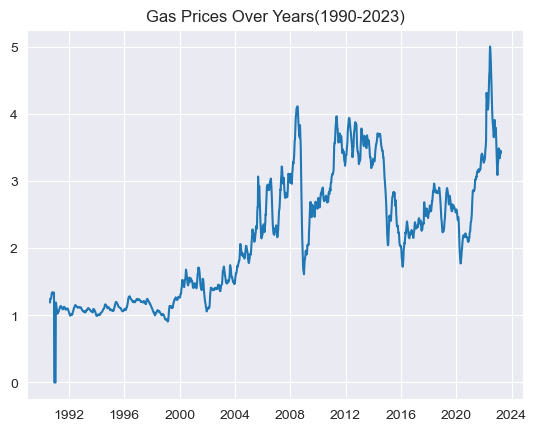

In [105]:
x = df['Date']
y = df['Price']
plt.plot(x, y)
plt.title('Gas Prices Over Years(1990-2023)')
plt.show()

### Average Gas Prices Over Year(1990-2023)

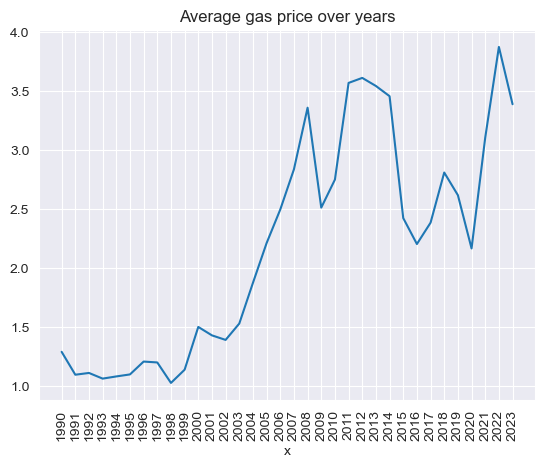

In [84]:
x= year_df.index
y= year_df["median"]

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)
ax.set_title("Average gas price over years")
# Set the x-axis label and tick values
ax.set_xlabel('x')
ax.set_xticks(x)
plt.xticks(rotation='vertical')

# Show the chart
plt.show()

On above plot, notice the significant increase from 2020 to 2022.

## Investigate the gas price trend for the last 10 years
Answer How gas prices had been changing for the last 10 years? Why gas prices changed?

In [ ]:
tenyear_df = df[df['Year'] > 2011]

### Average gas prices over year 2012-2023

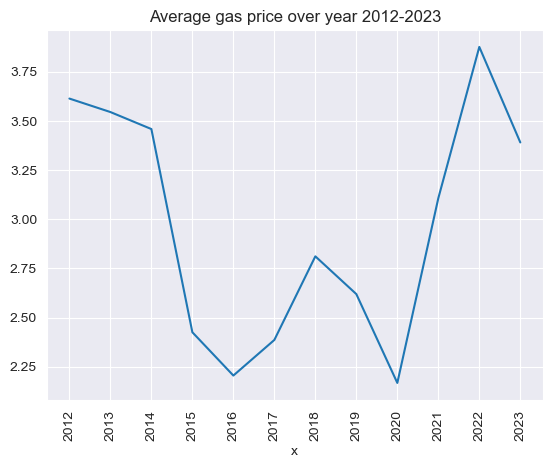

In [100]:
yearly_df = tenyear_df.groupby('Year')['Price'].agg(['mean', 'median', 'max'])

x= yearly_df.index
y= yearly_df["median"]

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)
ax.set_title("Average gas price over year 2012-2023")
# Set the x-axis label and tick values
ax.set_xlabel('x')
ax.set_xticks(x)
plt.xticks(rotation='vertical')



# Show the chart
plt.show() 


#### Findings:
  Over the last 10 years, <br> 
   - 2016 and 2020 had the lowest avg gas prices. 
   - 2022 had the highest avg gas price. <br>
   
#### Insight:
    2016 had low avg gas prices because the market was flooded with oil due to OPEC's decision not to cut oil production and US aalso increased its oil production through the use of hydraulic fracturing (fracking) technology. As  for 2022, the gas prices were the lowest due to covid-19. 
    From 2020-2022, the gas prices had been significantly increasing due to country recovering from covid. By 2022, the gas prices were unprecedently high.
    

### Average Montly Gas Price 2012-2023

    Month      mean  median    max
0       1  2.754472  2.5670  3.489
1       2  2.781694  2.5480  3.784
2       3  2.954577  2.6795  4.315
3       4  2.979125  2.8435  4.170
4       5  3.039833  2.8935  4.624
5       6  3.080447  2.8790  5.006
6       7  3.034327  2.8460  4.771
7       8  2.961633  2.8270  4.192
8       9  2.968894  2.8410  3.878
9      10  2.926429  2.8660  3.912
10     11  2.796426  2.6150  3.796
11     12  2.697367  2.5360  3.394


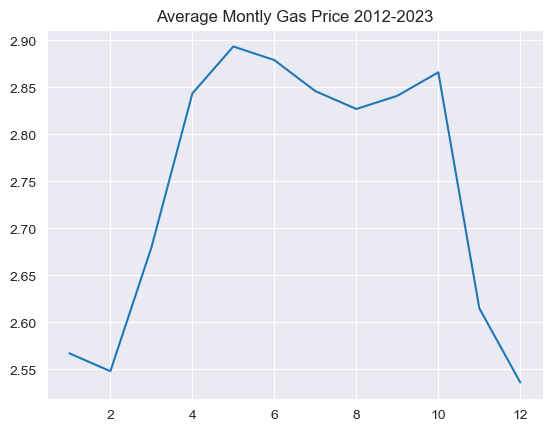

In [102]:
month_df = tenyear_df.groupby('Month')['Price'].agg(['mean', 'median', 'max'])
month_df.reset_index(inplace=True)
print(month_df)

plt.plot(month_df['Month'], month_df["median"])
plt.title('Average Montly Gas Price 2012-2023')
plt.show()



#### Findings
Over the last 10 years, 
  - May is the most costly month for gas. 
  - Avg Gas price significantly increased after Feburary
  - Avg Gas price signifcantly decreased after October.  <br>
  
### Insights
    It seems that gas prices increase in spring(month 3-5) and decrease in fall(month 10-12).<br> According to Forbes, https://www.forbes.com/sites/rrapier/2021/04/10/why-gas-prices-rise-nearly-every-spring/?sh=26838ebc6c8b, there is a scientific explanation behind this. Forbes explained that gasoline grades are different in summer and winter. In summer, RVP(reid vapor pressure) specification of gasonline needs to be lowered to reduce how quickly fuel evaporates, therefore summer grade fuel is more expansive to produce.


### Gas trend for Year 2012 to 2023

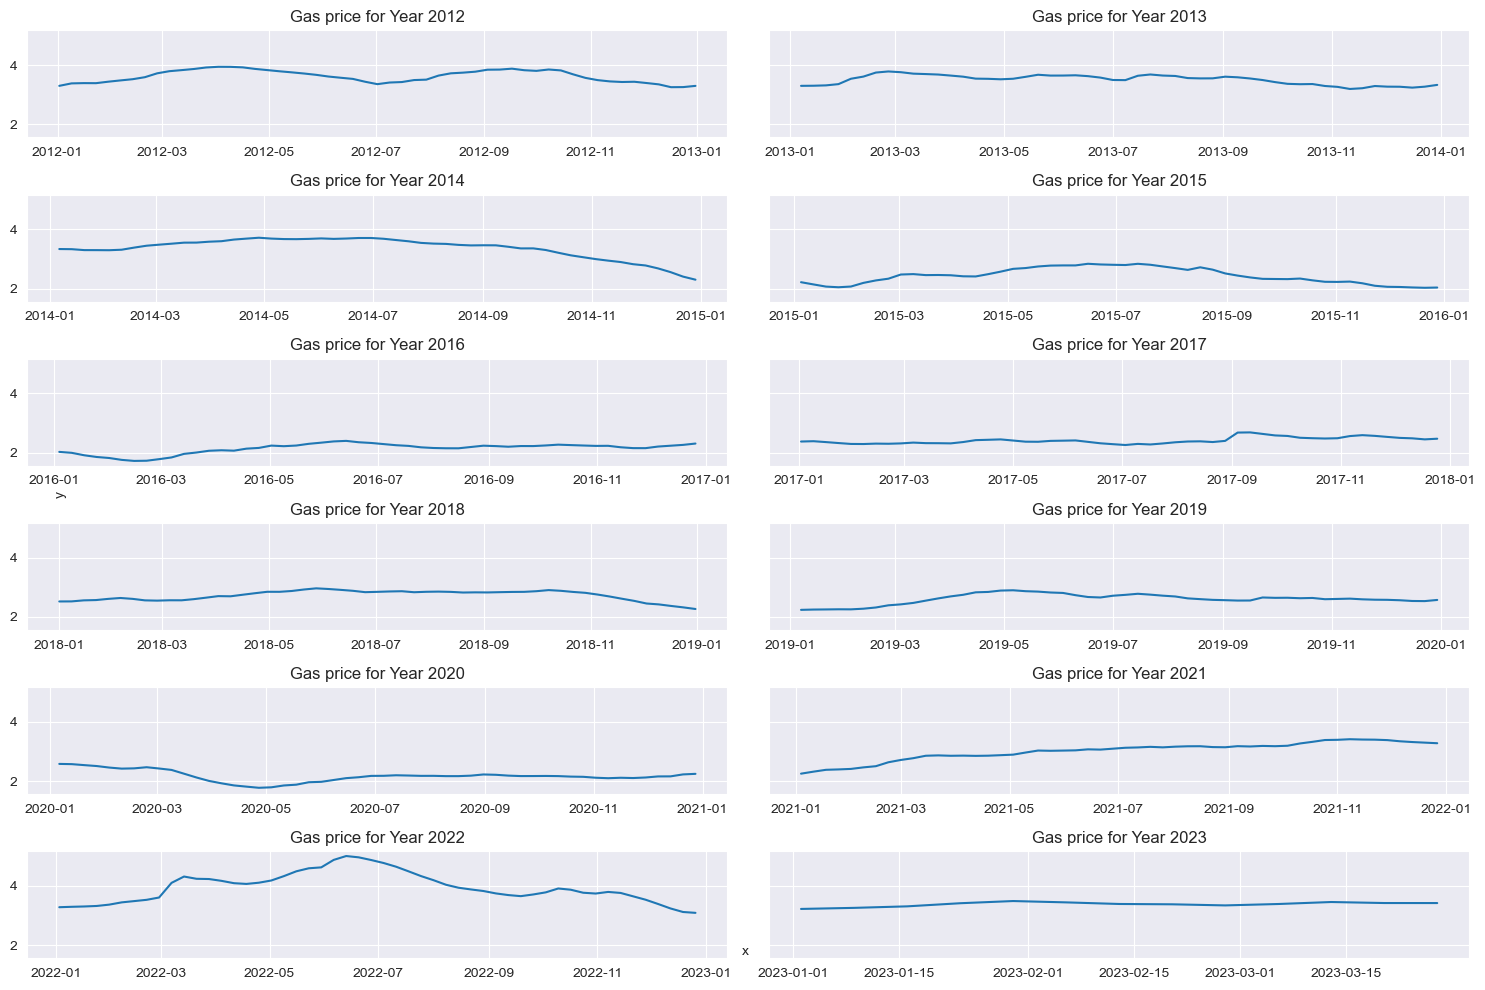

In [98]:
ax_index = 0
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 10), sharey=True)
year = 2012

for i, ax in enumerate(axs.flat):
    sub_set = tenyear_df[tenyear_df['Year'] == year]
    x = sub_set['Date']
    y = sub_set['Price']
    ax.plot(x, y)
    ax.set_title(f"Gas price for Year {year}")
    year = year +1

# Set common x and y axis labels
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'y', va='center', rotation='vertical')

# Add space between subplots
fig.tight_layout()
plt.show()
